# Decision Tree Example with the Moons data set from Scikit-Learn

From Scikit-Learn we'll be using the Make_Moons data set, which is a a simple toy dataset that makes two interleaving half circles, to visualize clustering and classification algorithms. In our case we'll be using the decision tree algorithm in Scikit-Learn.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import graphviz
%matplotlib inline

In [2]:
print(make_moons.__doc__)

Make two interleaving half circles

    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated.

    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.

    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    


In [3]:
mm = make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)

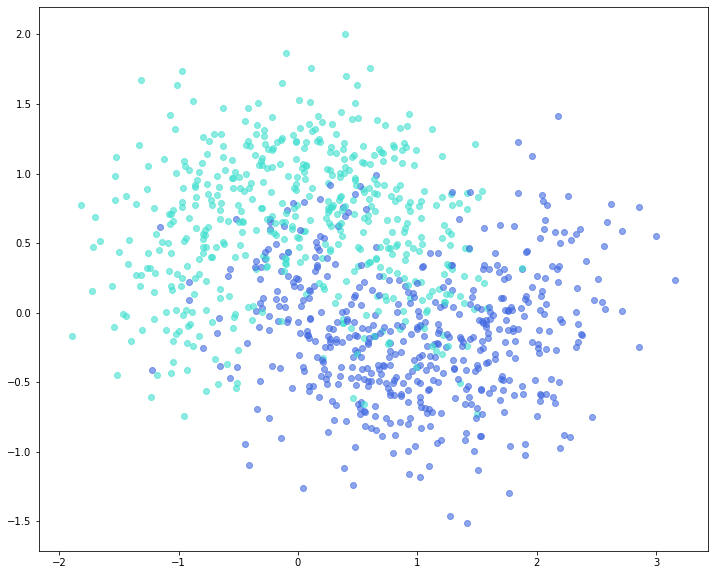

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
colors = ['turquoise', 'royalblue']
for (x, y), c in zip(mm[0], mm[1]):
    axes.scatter(x, y, c=colors[c], alpha=0.6);

## Training model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(mm[0], mm[1], test_size=0.3)

In [6]:
print(f'X_train.shape: {X_train.shape}\nX_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}\ny_test.shape: {y_test.shape}')

X_train.shape: (700, 2)
X_test.shape: (300, 2)
y_train.shape: (700,)
y_test.shape: (300,)


In [7]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
dot_data = export_graphviz(tree_clf, out_file=None, feature_names=['zero', 'one'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)

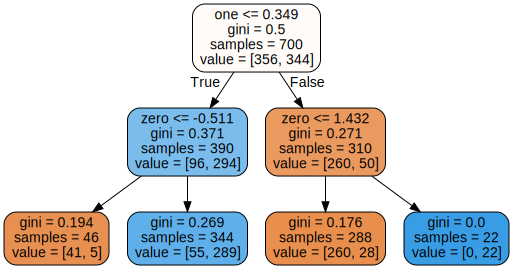

In [9]:
graph